# Data Gen/Validation notebook

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sympy as sym

sys.path.append('../src')
import deepymod_torch.VE_datagen as VE_datagen

In [2]:
E = [1,10,1]
eta = [20,20]
t = sym.symbols('t', real=True)
input_expr = sym.sinc(t)
#input_expr = lambda t: np.sin(t)/t
#dsigma = lambda t: (1/t)*(np.cos(t) - np.sin(t)/t)
input_type = 'Stress'
time_array = np.linspace(0.001, 20, 2000)

In [3]:
strain_array, stress_array = VE_datagen.calculate_strain_stress(input_type, time_array, input_expr, E, eta)#, D_input_lambda=dsigma)

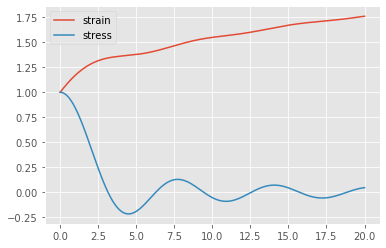

In [4]:
plt.plot(time_array, strain_array.flatten(), label='strain')
plt.plot(time_array, stress_array.flatten(), label='stress')
plt.legend()

In [5]:
errors = VE_datagen.equation_residuals(time_array, strain_array, stress_array, E, eta)

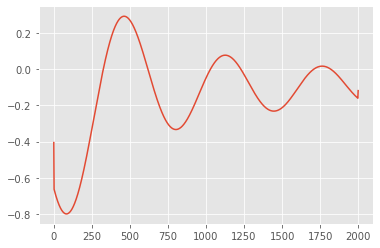

In [6]:
plt.plot(errors.flatten())